# Part 2 Writing a renderer

- https://www.geeksforgeeks.org/how-to-draw-3d-cube-using-matplotlib-in-python/
- https://stackoverflow.com/questions/70911608/plot-3d-cube-and-draw-line-on-3d-in-python
- https://pythonprogramming.net/opengl-rotating-cube-example-pyopengl-tutorial/

In [9]:
# Import libraries
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from math import atan, sin, cos
import numpy as np

In [10]:
def show_3d(vertices, edges):
    fig = plt.figure(figsize = (6, 6))
#     ax = fig.gca(projection = '3d')
    ax = fig.add_subplot(projection = '3d')
    for edge in edges:
        p1 = vertices[edge[0]]
        p2 = vertices[edge[1]]
        ax.plot([p1[0], p2[0]],
               [p1[1], p2[1]],
               [p1[2], p2[2]])
    ax.set_ylim(-5, 5)
    ax.set_xlim(-5, 5)
    ax.set_zlim(-5, 5)
    plt.show()
        
def show_2d(vertices, edges, size):
    fig = plt.figure()
    ax = fig.gca()
    for edge in edges:
        p1 = vertices[edge[0]]
        p2 = vertices[edge[1]]
        ax.plot([p1[0], p2[0]],
               [p1[1], p2[1]])
#     ax.set_xlim(size[0], size[1])
#     ax.set_ylim(size[0], size[1])
    plt.show()
    
# rotate one point(x, y, z)
def rotatePoint(x, y, z, ax, ay, az):
    # Rotate around x axis:
    rotatedX = x
    rotatedY = (y*cos(ax)) - (z*sin(ax))
    rotatedZ = (y*sin(ax)) + (z*cos(ax))
    x, y, z = rotatedX, rotatedY, rotatedZ
    
    # Rotate around y axis:
    rotatedX = (z*sin(ay)) + (x*cos(ay))
    rotatedY = y
    rotatedZ = (z*cos(ay)) - (x*sin(ay))
    x, y, z = rotatedX, rotatedY, rotatedZ
    
    # Rotated around z axis:
    rotatedX = (x*cos(az)) - (y*sin(az))
    rotatedY = (x*sin(az)) + (y*cos(az))
    rotatedZ = z
    return [rotatedX, rotatedY, rotatedZ]

# for creating Rotation matrix
def get_rx(angle):
    cs = cos(angle)#(angle*np.pi/180.)
    sn = sin(angle)#(angle*np.pi/180.)
    return np.array([[1.0,0.0,0.0],[0.0,cs,-sn],[0.0,sn,cs]])
def get_ry(angle):
    cs = cos(angle)#(angle*np.pi/180.)
    sn = sin(angle)#(angle*np.pi/180.)
    return np.array([[cs,0.0,sn],[0.0,1.0,0.0],[-sn,0.0,cs]])
def get_rz(angle):
    cs = cos(angle)#(angle*np.pi/180.)
    sn = sin(angle)#(angle*np.pi/180.)
    return np.array([[cs,-sn,0.0],[sn,cs,0.0],[0.0,0.0,1.0]])

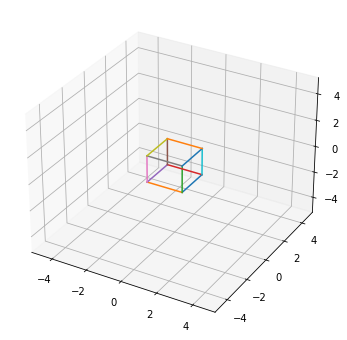

In [11]:
# define 3D cube
vertices= np.array(([[1, -1, -1], [1, 1, -1], [-1, 1, -1], [-1, -1, -1],
    [1, -1, 1], [1, 1, 1], [-1, -1, 1], [-1, 1, 1]]))
edges = ((0,1), (0,3), (0,4), (2,1),
    (2,3), (2,7), (6,3), (6,4),
    (6,7), (5,1), (5,4), (5,7))
show_3d(vertices, edges)

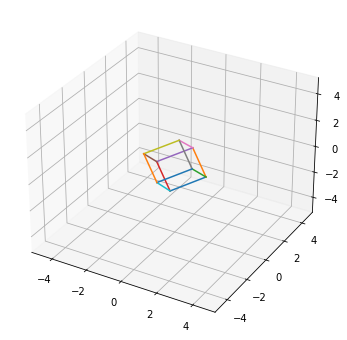

In [12]:
new_vertices = []
for point in vertices:
#     print(rotatePoint(point[0], point[1], point[2], 0.5, 0, 0))
    new_vertices.append(rotatePoint(point[0], point[1], point[2], 0.5, 2, 3))
    
show_3d(new_vertices, edges)

In [13]:
# Convert to homogeneous coordinates
tr_vertices = []
for point in new_vertices:
    point_tmp = point
    point_tmp.append(1)
    tr_vertices.append(point_tmp)
# tr_vertices

# define the translation
tx = 2
ty = 2
tz = 2

# construct the translation matrix
translation_matrix = [
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [tx, ty, tz, 1],
]

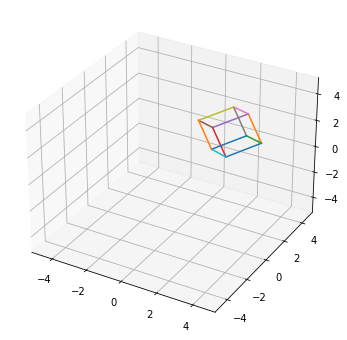

In [14]:
# apply the translation to point
tr_vertices_f = np.matmul(tr_vertices, translation_matrix)
trans_point = []
for point in tr_vertices_f:
    point = list(point[:-1])
    trans_point.append(point)
    
# present in 3d image
show_3d(trans_point, edges)

## Extrinsic matrix

In [15]:
# to make homogeneous coordinates, add '1' at the last
verticesss = np.array([[ 1, -1, -1, 1],
       [ 1,  1, -1, 1],
       [-1,  1, -1, 1],
       [-1, -1, -1, 1],
       [ 1, -1,  1, 1],
       [ 1,  1,  1, 1],
       [-1, -1,  1, 1],
       [-1,  1,  1, 1]])

In [16]:
def get_extrinsic_matrix(ax, ay, az, tx, ty, tz):
    # rotate matrix
    rotate_matrix = np.identity(4)
    rotate_matrix[:3, :3] = np.dot(np.dot(get_rx(ax), get_ry(ay)), get_rz(az))

    translation_matrix = np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [tx, ty, tz, 1],
    ])

    extrinsic_matrix = np.linalg.inv(rotate_matrix @ translation_matrix)
    
    return extrinsic_matrix

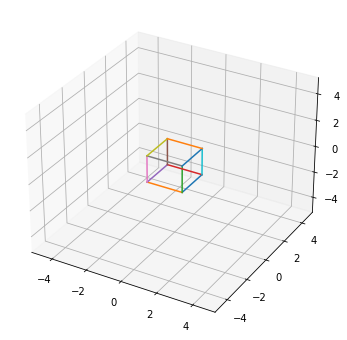

In [17]:
# this block is just for show original cube
# rotate matrix
rotate_matrix = np.identity(4)
rotate_matrix[:3, :3] = np.dot(np.dot(get_rx(0), get_ry(0)), get_rz(0))

# translation matrix
tx = 0
ty = 0
tz = 0

translation_matrix = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [tx, ty, tz, 1],
])

# extrinsic matrix : 
# extrinsic_matrix = np.dot(np.dot(projection , rotate_matrix) , translation_matrix)
# extrinsic_matrix = np.dot(rotate_matrix, translation_matrix)
extrinsic_matrix = np.linalg.inv(rotate_matrix @ translation_matrix)

# original cube
test = np.dot(verticesss,extrinsic_matrix)
show_3d(test[:, :3], edges)

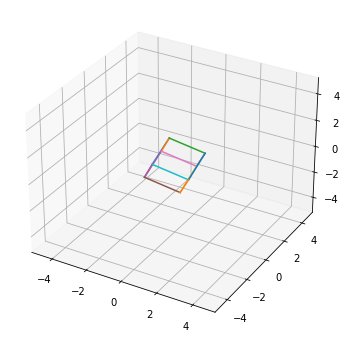

In [18]:
# only rotation
extrinsic_matrix = get_extrinsic_matrix(0.5, 2, 3, 0, 0, 0)
test = np.dot(verticesss,extrinsic_matrix)
show_3d(test[:, :3], edges)

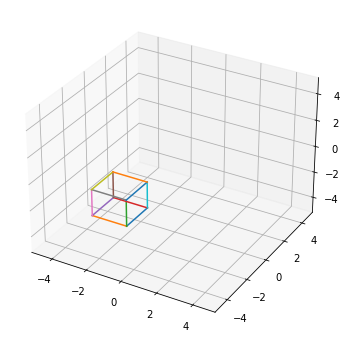

In [19]:
# only translation
extrinsic_matrix = get_extrinsic_matrix(0, 0, 0, 2, 2, 2)
test = np.dot(verticesss,extrinsic_matrix)
show_3d(test[:, :3], edges)

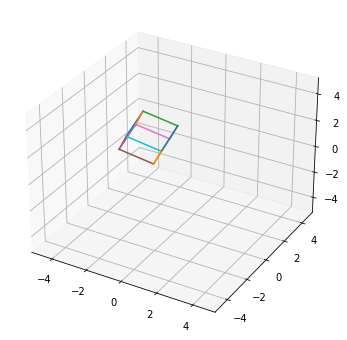

In [20]:
# rotation & translation
extrinsic_matrix = get_extrinsic_matrix(0.5, 2, 3, 2, 2, 2)
test = np.dot(verticesss,extrinsic_matrix)
show_3d(test[:, :3], edges)

## intrinsic matrix

In [21]:
def get_intrinsic_matrix(f, s):    
    # K = [[-f - sx; 0 f sy; 0 0 1]]
    K = [[f, 0, s[0]],
        [0, f, s[1]],
        [0, 0, 1],
        [0, 0, 0]]
    print(K)
    return K

In [23]:
K = get_intrinsic_matrix(0.45, [0.49, 0.51])
test_ = np.dot(test, K)
size = None

[[0.45, 0, 0.49], [0, 0.45, 0.51], [0, 0, 1], [0, 0, 0]]


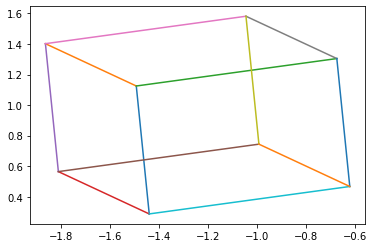

In [24]:
show_2d(test_, edges, size)